In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("seattle-weather.csv")
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,1/1/2012,0.0,12.8,5.0,4.7,drizzle
1,1/2/2012,10.9,10.6,2.8,4.5,rain
2,1/3/2012,0.8,11.7,7.2,2.3,rain
3,1/4/2012,20.3,12.2,5.6,4.7,rain
4,1/5/2012,1.3,8.9,2.8,6.1,rain


In [3]:
data = pd.read_csv("seattle-weather.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1438 non-null   object 
 1   precipitation  1438 non-null   float64
 2   temp_max       1438 non-null   float64
 3   temp_min       1438 non-null   float64
 4   wind           1438 non-null   float64
 5   weather        1438 non-null   object 
dtypes: float64(4), object(2)
memory usage: 67.5+ KB


In [4]:
data = pd.read_csv("seattle-weather.csv")
data.isnull()

,date,precipitation,temp_max,temp_min,wind,weather
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1433,False,False,False,False,False,False
1434,False,False,False,False,False,False
1435,False,False,False,False,False,False
1436,False,False,False,False,False,False


In [5]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [6]:
data.describe()

,precipitation,temp_max,temp_min,wind
count,1438.000000,1438.000000,1438.000000,1438.000000
mean,2.975869,16.588317,8.321419,3.226217
std,6.648617,7.307391,5.007229,1.424784
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,11.100000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.500000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [7]:
data.duplicated().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x24846af19a0>,
 'caps': [<matplotlib.lines.Line2D at 0x24846af1fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24846af16d0>],
 'medians': [<matplotlib.lines.Line2D at 0x24846b05520>],
 'fliers': [<matplotlib.lines.Line2D at 0x24846b057f0>],
 'means': []}

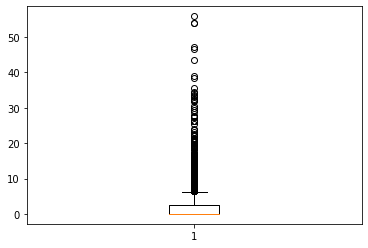

In [8]:
plt.boxplot(data["precipitation"])

{'whiskers': [<matplotlib.lines.Line2D at 0x24846bef6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x24846befca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24846bef400>],
 'medians': [<matplotlib.lines.Line2D at 0x24846bfc280>],
 'fliers': [<matplotlib.lines.Line2D at 0x24846bfc550>],
 'means': []}

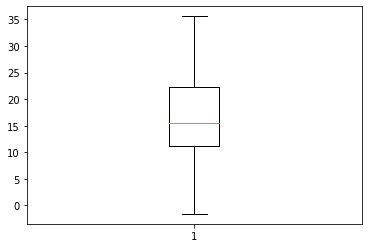

In [9]:
plt.boxplot(data['temp_max'])

{'whiskers': [<matplotlib.lines.Line2D at 0x24846c5fee0>,
 'caps': [<matplotlib.lines.Line2D at 0x24846c6e4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24846c5fc10>],
 'medians': [<matplotlib.lines.Line2D at 0x24846c6ea60>],
 'fliers': [<matplotlib.lines.Line2D at 0x24846c6ed30>],
 'means': []}

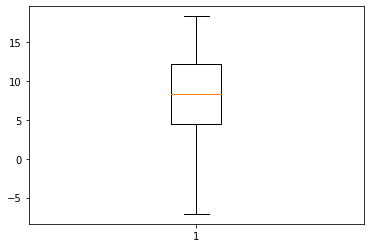

In [10]:
plt.boxplot(data["temp_min"])

{'whiskers': [<matplotlib.lines.Line2D at 0x24846cd0070>,
 'caps': [<matplotlib.lines.Line2D at 0x24846cd0610>,
 'boxes': [<matplotlib.lines.Line2D at 0x24846cbfd60>],
 'medians': [<matplotlib.lines.Line2D at 0x24846cd0bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24846cd0e80>],
 'means': []}

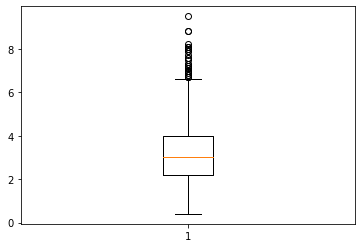

In [11]:
plt.boxplot(data["wind"])

(array([ 12.,  52., 206., 264., 263., 207., 193., 139.,  78.,  24.]),
 array([-1.6 ,  2.12,  5.84,  9.56, 13.28, 17.  , 20.72, 24.44, 28.16,
        31.88, 35.6 ]),
 <BarContainer object of 10 artists>)

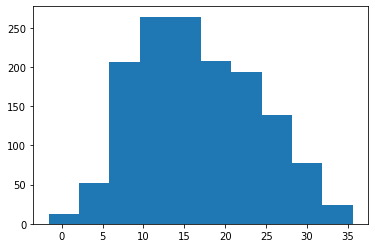

In [12]:
plt.hist(data['temp_max'])

(array([  8.,  29.,  48., 142., 180., 265., 257., 206., 236.,  67.]),
 array([-7.1 , -4.56, -2.02,  0.52,  3.06,  5.6 ,  8.14, 10.68, 13.22,
        15.76, 18.3 ]),
 <BarContainer object of 10 artists>)

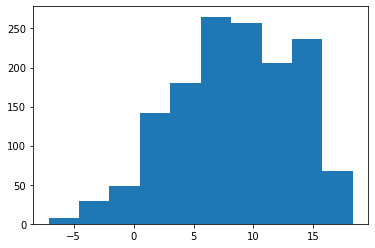

In [13]:
plt.hist(data["temp_min"])

<Figure size 720x360 with 0 Axes>

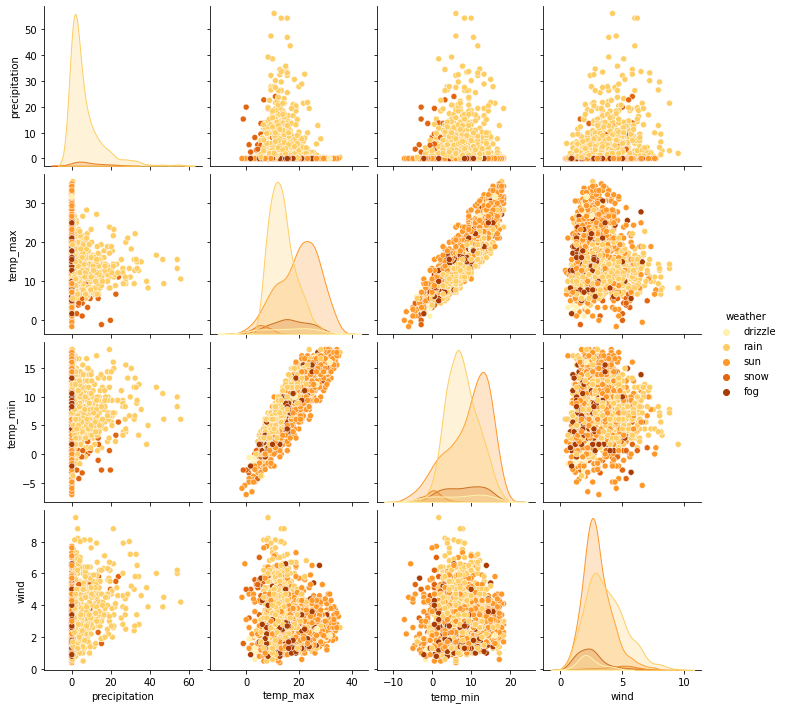

In [14]:
plt.figure(figsize=(10,5))
sns.pairplot(data.drop('date',axis=1),hue='weather',palette="YlOrBr")
plt.show()

In [15]:
data.corr()

,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.225236,-0.069487,0.322171
temp_max,-0.225236,1.000000,0.873637,-0.159409
temp_min,-0.069487,0.873637,1.000000,-0.070896
wind,0.322171,-0.159409,-0.070896,1.000000


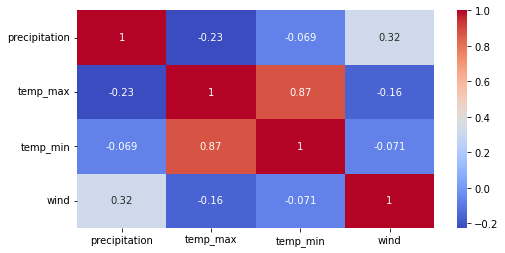

In [16]:
cor=data.corr()
plt.figure(figsize=(8,4))
sns.heatmap(cor,annot=True,cmap="coolwarm")
plt.show()

In [17]:
x=data[["precipitation","temp_max","temp_min","wind"]]
y=data["weather"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [18]:
x_test

,precipitation,temp_max,temp_min,wind
34,0.0,15.6,5.0,4.3
1061,3.3,14.4,11.7,6.6
1255,0.0,28.9,14.4,2.7
333,1.5,12.8,7.8,4.2
141,14.0,16.7,10.0,4.0
...,...,...,...,...
156,16.0,13.3,8.3,3.3
8,4.3,9.4,5.0,3.4
1023,11.7,16.1,12.2,3.1
1311,0.0,26.1,14.4,2.6


In [19]:
y_test

34       sun
1061    rain
1255     sun
333     rain
141     rain
        ... 
156     rain
8       rain
1023    rain
1311     fog
771     rain
Name: weather, Length: 288, dtype: object

In [20]:
x_train

,precipitation,temp_max,temp_min,wind
512,9.7,16.7,11.1,3.1
482,0.0,13.9,10.6,5.9
1050,0.0,9.4,-2.1,4.2
670,1.3,17.8,11.7,1.4
1238,0.0,16.1,11.7,2.6
...,...,...,...,...
763,0.0,8.9,1.1,2.5
835,0.5,14.4,7.8,4.0
1216,0.0,18.3,8.9,3.7
559,0.0,26.1,11.1,3.1


In [21]:
y_train

512     rain
482      sun
1050     sun
670     rain
1238     sun
        ... 
763      sun
835     rain
1216     sun
559      sun
684     rain
Name: weather, Length: 1150, dtype: object

In [22]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1150, 4)
(1150,)
(288, 4)
(288,)


In [23]:
model = tree.DecisionTreeClassifier()
my_model=model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array(['sun', 'rain', 'rain', 'rain', 'rain', 'sun', 'sun', 'sun', 'rain',
       'rain', 'sun', 'fog', 'rain', 'rain', 'rain', 'fog', 'fog', 'sun',
       'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain', 'rain', 'rain',
       'sun', 'rain', 'sun', 'rain', 'sun', 'rain', 'rain', 'rain', 'sun',
       'sun', 'sun', 'rain', 'sun', 'rain', 'rain', 'sun', 'rain', 'rain',
       'sun', 'rain', 'drizzle', 'rain', 'sun', 'rain', 'fog', 'rain',
       'sun', 'sun', 'rain', 'rain', 'fog', 'rain', 'rain', 'sun', 'sun',
       'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain', 'rain', 'rain',
       'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun', 'sun',
       'sun', 'rain', 'rain', 'sun', 'sun', 'sun', 'rain', 'rain', 'rain',
       'sun', 'rain', 'sun', 'sun', 'drizzle', 'sun', 'sun', 'sun', 'fog',
       'rain', 'rain', 'rain', 'sun', 'rain', 'drizzle', 'rain', 'sun',
       'sun', 'rain', 'sun', 'rain', 'rain', 'sun', 'rain', 'rain', 'sun',
       'sun', 'rain', 'rain', 'drizzle',

In [24]:
accuracy_score(y_pred,y_test)

0.75

In [25]:
model_2 = RandomForestClassifier()
rmodel = model_2.fit(x_train,y_train)
r_ypred = rmodel.predict(x_test)
r_ypred

array(['sun', 'rain', 'sun', 'rain', 'rain', 'sun', 'sun', 'sun', 'rain',
       'rain', 'sun', 'fog', 'rain', 'rain', 'rain', 'sun', 'rain', 'sun',
       'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain', 'rain', 'rain',
       'sun', 'rain', 'sun', 'rain', 'sun', 'rain', 'rain', 'rain', 'sun',
       'sun', 'sun', 'rain', 'sun', 'rain', 'rain', 'sun', 'rain', 'rain',
       'sun', 'rain', 'drizzle', 'rain', 'sun', 'rain', 'sun', 'rain',
       'sun', 'sun', 'rain', 'rain', 'sun', 'rain', 'rain', 'sun', 'sun',
       'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain', 'rain', 'rain',
       'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun', 'sun',
       'sun', 'rain', 'rain', 'sun', 'sun', 'sun', 'rain', 'rain', 'rain',
       'sun', 'rain', 'sun', 'sun', 'drizzle', 'sun', 'sun', 'sun', 'sun',
       'rain', 'rain', 'rain', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun',
       'rain', 'sun', 'rain', 'rain', 'sun', 'rain', 'sun', 'sun', 'sun',
       'rain', 'sun', 'drizzle', 'rain

In [26]:
accuracy_score(y_pred,y_test)

0.75

In [27]:
model_2 = RandomForestClassifier(criterion ='entropy',n_estimators = 100)
rmodel = model_2.fit(x_train,y_train)
r_ypred = rmodel.predict(x_test)
r_ypred

array(['sun', 'rain', 'sun', 'rain', 'rain', 'sun', 'sun', 'sun', 'rain',
       'rain', 'sun', 'sun', 'rain', 'rain', 'rain', 'sun', 'rain', 'sun',
       'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain', 'rain', 'rain',
       'sun', 'rain', 'sun', 'rain', 'sun', 'rain', 'rain', 'rain', 'sun',
       'sun', 'sun', 'rain', 'sun', 'rain', 'rain', 'sun', 'rain', 'rain',
       'sun', 'rain', 'drizzle', 'rain', 'sun', 'rain', 'sun', 'rain',
       'sun', 'sun', 'rain', 'rain', 'sun', 'rain', 'rain', 'sun', 'sun',
       'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain', 'rain', 'rain',
       'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun', 'sun',
       'sun', 'rain', 'rain', 'sun', 'sun', 'drizzle', 'rain', 'rain',
       'rain', 'sun', 'rain', 'sun', 'sun', 'drizzle', 'sun', 'sun',
       'sun', 'sun', 'rain', 'rain', 'rain', 'sun', 'rain', 'sun', 'rain',
       'sun', 'sun', 'rain', 'sun', 'rain', 'rain', 'sun', 'rain', 'sun',
       'sun', 'sun', 'rain', 'sun', 'drizzle', '

In [28]:
accuracy_score(y_pred,y_test)

0.75

In [ ]:
new_data=[[0.0,0.0,0.0,0.0]]
precipitation=float(input("enter precipitation:"))
temp_max=float(input("enter max temperature:"))
temp_min=float(input("enter min temperature:"))
wind=float(input("enter wind:"))
new_data=[[precipitation,temp_max,temp_min,wind]]
if(temp_max==0 or temp_min==0 or wind==0):
 print('invalid')
else:
 r_ypred=model.predict(new_data)
 print(r_ypred)